In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
import scipy.signal
import math
import cv2
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('./Dataset/test1.JPG')
resize=cv2.resize(img,(150,150),2)
resize.shape

(150, 150, 3)

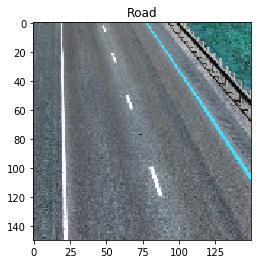

In [3]:
plt.title('Road')
plt.imshow(resize)

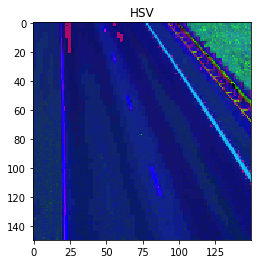

In [4]:
HSV = cv2.cvtColor(resize, cv2.COLOR_BGR2HSV)
plt.title('HSV')
plt.imshow(HSV)

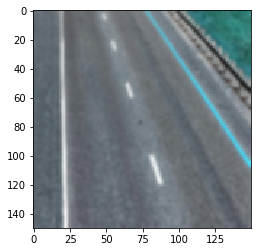

In [5]:
def GaussianBlur(img):
    GaussianBlur=cv2.GaussianBlur(img,(5,5),0)
    plt.imshow(GaussianBlur)
Gaussian=GaussianBlur(resize)

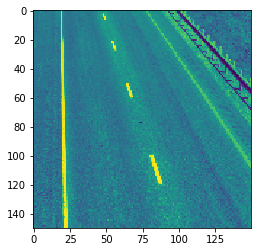

In [6]:
def grey_scale(img):
    grey_img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    plt.imshow(grey_img)
    return grey_img
grey_img=grey_scale(resize)

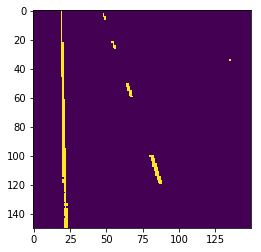

In [7]:
def white_mask():
    lower_white =np.array([0,0,215])
    upper_white=np.array([255,40,255])
    # resize is filter
    wmask= cv2.inRange(HSV,lower_white,upper_white)
    plt.imsave('./Results/test1_binaryMask_white.jpg'.format(0),wmask)
    plt.imshow(wmask)
    return wmask
w_mask=white_mask()

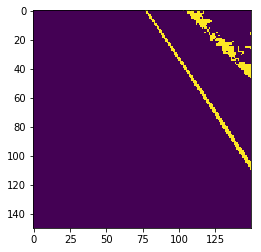

In [8]:
def Yellow_mask():
    lower_yellow =np.array([10,100,100])
    upper_yellow=np.array([30,255,255])
    # resize is filter
    ymask= cv2.inRange(HSV,lower_yellow,upper_yellow)
    plt.imsave('./Results/test1_binaryMask_Yellow.jpg'.format(0),ymask)
    plt.imshow(ymask)
    return ymask
y_mask=Yellow_mask()

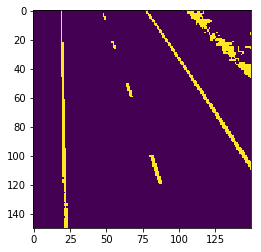

In [9]:
def RoadLines_Yellow_White():
    filterimage=cv2.bitwise_or(w_mask,y_mask)
    plt.imshow(filterimage)
    #filterimage=ApplyGaussian(filterimage,gxy)
    plt.imsave('./Results/test1_filteredimage.jpg'.format(0),filterimage)
    return filterimage
filterimage=RoadLines_Yellow_White() 

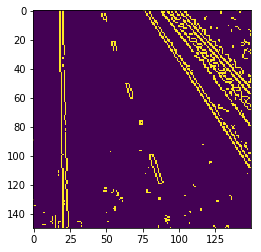

In [10]:
def canny_edge(img):
    plt.imsave('./Results/test1_filteredimage_gray.jpg'.format(0),grey_img)
    canny_edge=cv2.Canny(grey_img,150,200)
    plt.imshow(canny_edge)
    return canny_edge
canny_edge=canny_edge(grey_img)

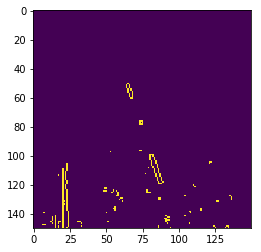

In [11]:
def ROI(img):
    #ROI=img[10:100,10:100]
    #plt.imshow(ROI)
    h,w=img.shape
    tri_shape=np.array([[(-10,150),(65,50),(170,150)]])
    ROI=np.zeros_like(img)
    ROI=cv2.fillPoly(ROI,tri_shape,200)
    plt.imshow(ROI)
    #plt.imsave('./Results/test1_shape.jpg'.format(0),ROI)
    ROI=cv2.bitwise_and(img,ROI)
    plt.imsave('./Results/test1_roi.jpg'.format(0),ROI)

    plt.imshow(ROI)
    return ROI

region=ROI(canny_edge)

In [30]:
def Hough_Transform_Line(image):
    width,height=image.shape
    max_dist=np.sqrt(width*width+height*height)
    theta=np.deg2rad(np.arange(-180,180))
    thetasize=len(theta)
    max_dist=int(np.round(max_dist))

    acc_arr=np.zeros((max_dist,thetasize))
    costheta=np.cos(theta)
    sintheta=np.sin(theta)

    for x in range(width):
        for y in range (height):
            for j in range(thetasize):
                rho=np.round((image[x][y]*costheta[j])+(image[x][y]*sintheta[j]))
                #acc_arr[rho][j] = acc_arr[rho][j] + 1

    Houghlines = cv2.HoughLinesP(canny_edge, 2, np.pi/180, 100)
    #print(Houghlines)
    return Houghlines

        
Houghlines=Hough_Transform_Line(canny_edge)

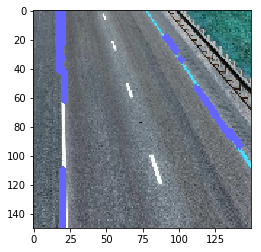

In [28]:
def LinearRegression(Houghlines):
    for i in Houghlines:
        x1, y1, x2, y2 = i[0]
        cv2.line(resize,(x1, y1),(x2, y2),(100,100,255),3)
        plt.imshow(resize)
        plt.imsave('./Results/test1_ouput.jpg'.format(0),resize)

LinearRegression(Houghlines)